In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [276]:
 #read daa set and check few values
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [277]:
#check the columns
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [278]:
#look for data types of columns and null values . no null values found
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [279]:
bikesharing.drop(['instant', 'dteday'], axis=1, inplace=True)

In [280]:
#create a new data set without the columns instant as this  columns dont add value
#also drop dteday as we already have year and month as columns and the day of month should not matter
#check the correlations using pair plot

#sns.pairplot(bikesharing)
#plt.show()


In [281]:

#replace integer values for below columns to have them as categorical for better preciction
bikesharing['weathersit'] = bikesharing['weathersit'].replace(to_replace=[1,2,3,4], value=['clear', 'mist', 'lightsnow', 'heavyrain'])
bikesharing['season'] = bikesharing['season'].replace(to_replace=[1,2,3,4], value=['spring', 'summer', 'fall', 'winter'])
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


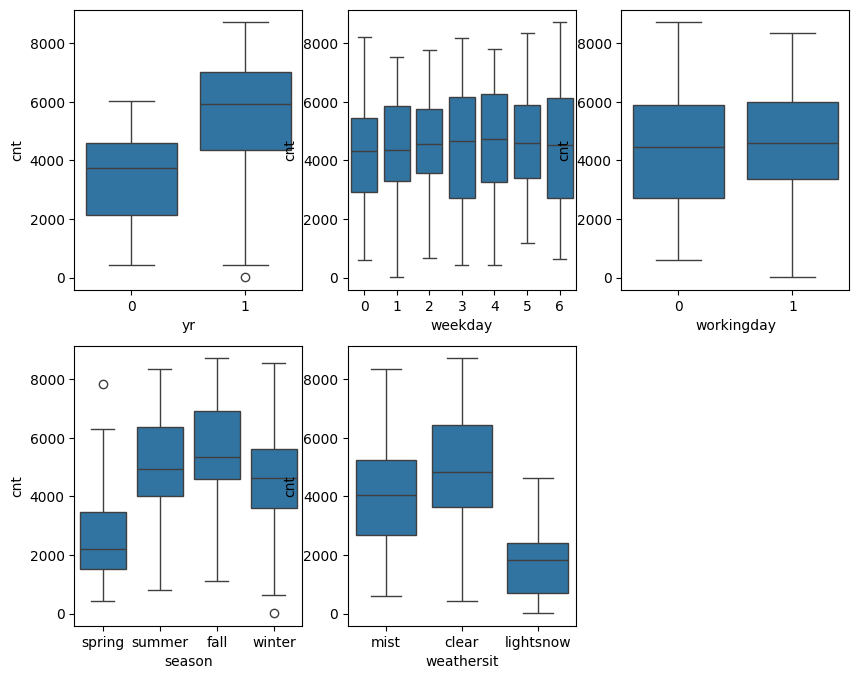

In [282]:
#box plot does not show much outliers

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x='weekday', y='cnt', data=bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data=bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)

plt.show()

In [283]:
# check if we need the three variables holiday, weekday and working day
print(bikesharing['holiday'].value_counts())
bikesharing.query("holiday==1")["workingday"]

#this shows holiday field may not be needed as its counted in working day being yes or no
bikesharing.drop(['holiday'], axis=1, inplace=True)

holiday
0    709
1     21
Name: count, dtype: int64


In [284]:
#convert working day, season , weather sit and into categorical

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 74.3+ KB


In [285]:
#lets drop casual and registered columns also for now as the problem statement is not asking us to predict the split of registered or casual cnt
bikesharing.drop(['casual', 'registered'], axis=1, inplace=True)

In [286]:
#create dummy variables for season , weathersit
bikesharing = pd.get_dummies(bikesharing, columns=['season', 'weathersit'], drop_first=True)
bikesharing.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_lightsnow,weathersit_mist
0,0,1,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [287]:
bikesharing['season_spring'] = bikesharing['season_spring'].astype(int)
bikesharing['season_summer'] = bikesharing['season_summer'].astype(int)
bikesharing['season_winter'] = bikesharing['season_winter'].astype(int)
bikesharing['weathersit_mist'] = bikesharing['weathersit_mist'].astype(int)
bikesharing['weathersit_lightsnow'] = bikesharing['weathersit_lightsnow'].astype(int)
bikesharing


,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_lightsnow,weathersit_mist
0,0,1,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,4,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1
726,1,12,5,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1
727,1,12,6,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1
728,1,12,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0


In [288]:
#test train split of the data as 70-30
df_train, df_test = train_test_split(bikesharing, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)
#

(510, 14)
(219, 14)


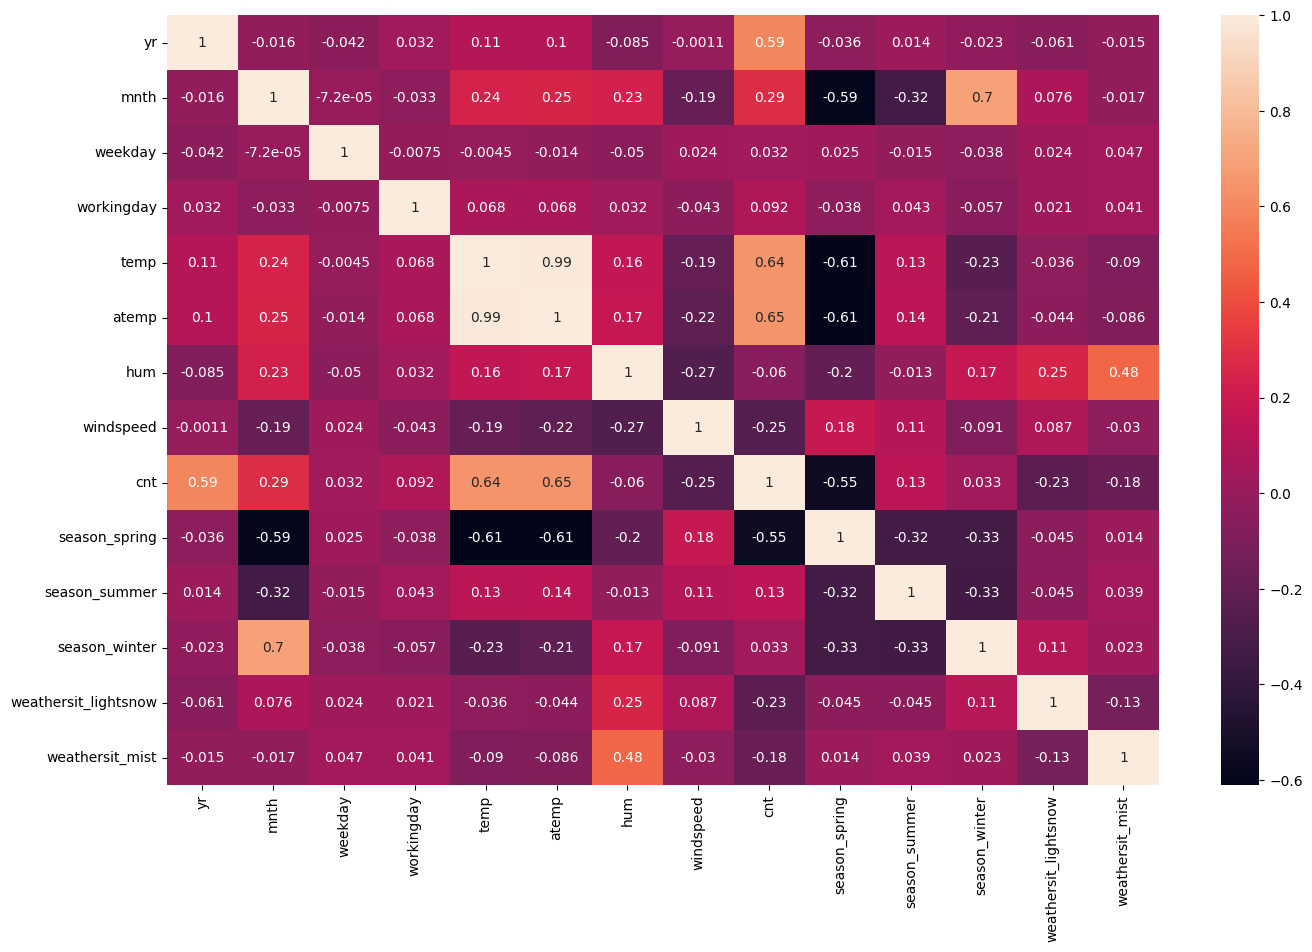

In [289]:
#find the correlation among variables using heat map
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()
#baseed on this heat map temp and atemp seems to have high correlation with the target variable cnt

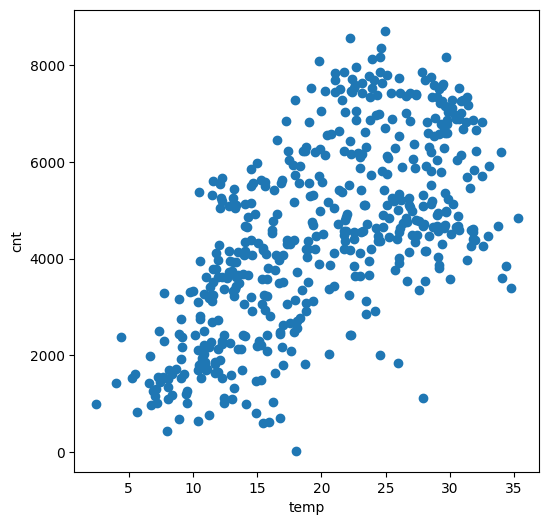

In [290]:
#pairplot betweeen temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

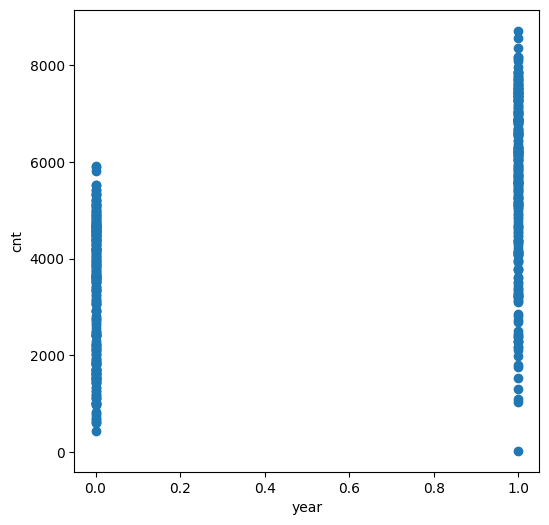

In [291]:
#pairplot betweeen temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.xlabel('year')
plt.ylabel('cnt')
plt.show()

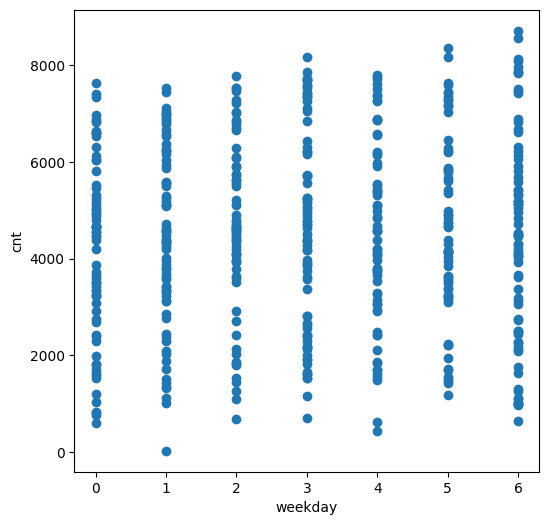

In [292]:
#pairplot betweeen temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.weekday, df_train.cnt)
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.show()

In [293]:
df_train.workingday.value_counts()

,count
workingday,
1,345
0,165


In [294]:
#check if there is a need for scaling
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars].head()

,temp,atemp,hum,windspeed
653,19.201653,23.0423,55.8333,12.208807
576,29.246653,33.1448,70.4167,11.083475
426,16.980847,20.6746,62.1250,10.792293
728,10.489153,11.5850,48.3333,23.500518
482,15.443347,18.8752,48.9583,8.708325


In [295]:
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_lightsnow,weathersit_mist
653,1,10,2,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0
576,1,7,2,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0
426,1,3,6,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,0
482,1,4,6,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,1


In [296]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train)

     yr  mnth  weekday  workingday      temp     atemp       hum  windspeed  \
653   1    10        2           1  0.509887  0.501133  0.575354   0.300794   
576   1     7        2           1  0.815169  0.766351  0.725633   0.264686   
426   1     3        6           0  0.442393  0.438975  0.640189   0.255342   
728   1    12        0           0  0.245101  0.200348  0.498067   0.663106   
482   1     4        6           0  0.395666  0.391735  0.504508   0.188475   
..   ..   ...      ...         ...       ...       ...       ...        ...   
526   1     6        1           1  0.824514  0.762183  0.605840   0.355596   
578   1     8        4           1  0.863973  0.824359  0.679690   0.187140   
53    0     2        3           1  0.202618  0.218747  0.435939   0.111379   
350   0    12        6           0  0.248216  0.223544  0.577930   0.431816   
79    0     3        1           1  0.462664  0.434043  0.759870   0.529881   

     season_spring  season_summer  season_winter  w

In [297]:
#add constant to the statsmodel and then build a linear regerssion model and check summary
X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train, X_train_sm)
lr_model = lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.92e-182
Time:                        07:07:07   Log-Likelihood:                -4132.6
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     496   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2050.7980    343.805      5.965      0.000    1375.305    2726.291
yr                    2019.4913     73.162     27.603      0.000    1875.745    2163.238
mnth                     8.1775     20.467      0.400      0.690     -32.034      48.390
weekday                 74.8057     18.027      4.150      0.000      39.388     110.224
workingday             205.8092     77.308      2.662      0.008      53.918     357.700
temp                  3672.5853   1211.127      3.032      0.003    1293.013    6052.158
atemp                  652.3024   1237.454      0.527      0.598   -1778.995    3083.600
hum                  -1094.5939    340.395     -3.216      0.001   -1763.388    -425.800
windspeed            -1547.2724    235.956     -6.557      0.000   -2010.869   -1083.676
season_spring         -626.5703    201.224     -3.114      0.002   -1021.927    -231.213
season_summer          395.8029    136.711      2.895      0.004     127.199     664.407
season_winter          738.4523    162.601      4.541      0.000     418.980    1057.925
weathersit_lightsnow -2137.5462    238.153     -8.976      0.000   -2605.460   -1669.633
weathersit_mist       -500.4164     95.143     -5.260      0.000    -687.349    -313.484
==============================================================================
Omnibus:                       81.588   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.897
Skew:                          -0.774   Prob(JB):                     1.98e-50
Kurtosis:                       5.894   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,temp,378.67
5,atemp,365.90
6,hum,30.82
1,mnth,15.37
7,windspeed,5.05
10,season_winter,4.73
8,season_spring,4.32
2,weekday,3.15
3,workingday,3.05
9,season_summer,2.65


In [299]:
#drop variables with High p value and high VIF i.e atemp and mnth
X = X_train.drop(['atemp', 'mnth'], axis=1)


In [300]:
X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm)
lr_model = lr_model.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.07e-184
Time:                        07:07:07   Log-Likelihood:                -4132.9
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     498   BIC:                             8341.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2099.6225    318.622      6.590      0.000    1473.612    2725.632
yr                    2017.5825     72.974     27.648      0.000    1874.208    2160.957
weekday                 74.7512     17.952      4.164      0.000      39.481     110.021
workingday             204.9968     77.148      2.657      0.008      53.422     356.572
temp                  4296.2845    297.411     14.446      0.000    3711.950    4880.619
hum                  -1073.7643    337.979     -3.177      0.002   -1737.804    -409.724
windspeed            -1569.1299    231.090     -6.790      0.000   -2023.162   -1115.098
season_spring         -651.7339    178.146     -3.658      0.000   -1001.745    -301.723
season_summer          383.4377    119.663      3.204      0.001     148.332     618.544
season_winter          779.0718    146.066      5.334      0.000     492.091    1066.053
weathersit_lightsnow -2151.0968    236.892     -9.080      0.000   -2616.528   -1685.666
weathersit_mist       -503.7889     94.807     -5.314      0.000    -690.060    -317.518
==============================================================================
Omnibus:                       80.171   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.044
Skew:                          -0.759   Prob(JB):                     8.22e-50
Kurtosis:                       5.886   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#after dropping atemp , VIF of temp has ggreatly reduced
# hum has high VIF but low p value so can be left
# rest all has low p value < 0.05


,Features,VIF
4,hum,27.31
3,temp,15.68
5,windspeed,4.68
6,season_spring,3.87
8,season_winter,3.09
1,weekday,3.08
2,workingday,3.04
10,weathersit_mist,2.28
7,season_summer,2.27
0,yr,2.08


<ipython-input-302-e1ce678940f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

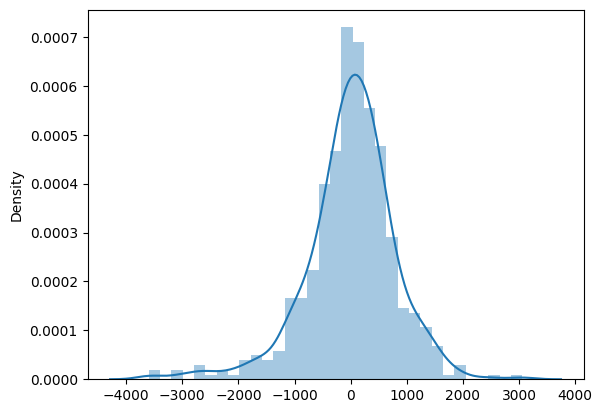

In [302]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [303]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [325]:
#using recurisve feature eleimination from scikit learn
lm = LinearRegression()
lm_sklearn = lm.fit(X_train, y_train)
print(lm_sklearn.score(X_train, y_train))
print(X_train.columns)
print(lm_sklearn.coef_)
print(lm_sklearn.intercept_)

0.8318396381170646
Index(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_lightsnow', 'weathersit_mist'],
      dtype='object')
[ 2019.49125353     8.17754055    74.8056936    205.80916731
  3672.58534587   652.3023941  -1094.59386131 -1547.2724428
  -626.57027868   395.80287843   738.45233109 -2137.5462035
  -500.41640704]
2050.7980412583565


In [ ]:
rfe = RFE(lm_sklearn, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [305]:
#check the features used by rfe and thier rank
#the below shows mnth, weekday and working day have not been used by the model and rfe has eliminiated
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_lightsnow', True, 1),
 ('weathersit_mist', True, 1)]

In [306]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_lightsnow',
       'weathersit_mist'],
      dtype='object')

In [307]:
X_train_rfe =  X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)


In [308]:
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.14e-181
Time:                        07:07:08   Log-Likelihood:                -4144.9
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     499   BIC:                             8358.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2549.3196    312.362      8.161      0.000    1935.614    3163.026
yr                    2008.2263     74.530     26.945      0.000    1861.795    2154.658
temp                  3926.4722   1235.299      3.179      0.002    1499.445    6353.500
atemp                  423.9580   1262.286      0.336      0.737   -2056.093    2904.009
hum                  -1228.0193    344.416     -3.566      0.000   -1904.704    -551.335
windspeed            -1586.4305    240.662     -6.592      0.000   -2059.267   -1113.595
season_spring         -666.5978    183.452     -3.634      0.000   -1027.031    -306.165
season_summer          367.1106    124.636      2.945      0.003     122.234     611.987
season_winter          744.3540    151.900      4.900      0.000     445.912    1042.796
weathersit_lightsnow -2054.7249    242.098     -8.487      0.000   -2530.381   -1579.069
weathersit_mist       -452.0642     96.420     -4.688      0.000    -641.504    -262.624
==============================================================================
Omnibus:                       73.917   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.782
Skew:                          -0.711   Prob(JB):                     1.53e-44
Kurtosis:                       5.734   Cond. No.                         78.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
# dropping column atemp since it has high p value though RFE did not eliminate it
col = col.drop(['atemp'])

In [310]:
X_train_rfe =  X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          5.20e-182
Time:                        07:07:08   Log-Likelihood:                -4144.9
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     500   BIC:                             8352.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2546.7398    311.990      8.163      0.000    1933.767    3159.713
yr                    2007.8267     74.454     26.967      0.000    1861.544    2154.109
temp                  4328.5970    303.839     14.246      0.000    3731.639    4925.555
hum                  -1222.4208    343.707     -3.557      0.000   -1897.709    -547.132
windspeed            -1602.0216    235.933     -6.790      0.000   -2065.564   -1138.479
season_spring         -659.4162    182.040     -3.622      0.000   -1017.073    -301.759
season_summer          375.0951    122.239      3.069      0.002     134.929     615.261
season_winter          753.7770    149.154      5.054      0.000     460.731    1046.823
weathersit_lightsnow -2060.1515    241.343     -8.536      0.000   -2534.324   -1585.979
weathersit_mist       -452.9618     96.298     -4.704      0.000    -642.160    -263.763
==============================================================================
Omnibus:                       72.940   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.417
Skew:                          -0.701   Prob(JB):                     4.98e-44
Kurtosis:                       5.723   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
#residual analysis
y_train_pred  = lm.predict(X_train_rfe)

In [312]:
#r2 scrore for training dataset
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8235279263678164

<ipython-input-313-b3b4f963539b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

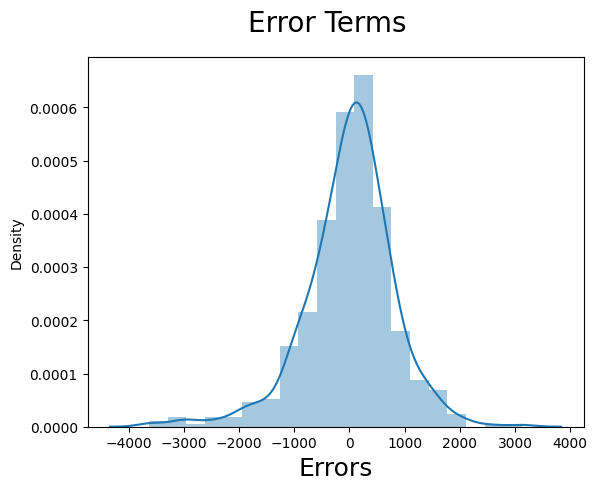

In [313]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [314]:
#start the scaling and model prediction on test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars].head()

,temp,atemp,hum,windspeed
184,29.793347,33.27085,63.7917,5.459106
535,32.082500,36.04875,59.2083,7.625404
299,19.270000,22.85230,81.2917,13.250121
221,31.433347,34.24915,42.4167,13.417286
152,29.315000,32.19710,30.5000,19.583229


In [315]:
scaler = MinMaxScaler()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_lightsnow,weathersit_mist
184,0,7,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,0,0,0,1
535,1,6,3,1,0.911423,0.855132,0.470417,0.231142,6211,0,1,0,0,0
299,0,10,4,1,0.496221,0.492359,0.777843,0.443398,2659,0,0,1,0,1
221,0,8,3,1,0.890387,0.805661,0.236659,0.449707,4780,0,0,0,0,0
152,0,6,4,1,0.821739,0.749249,0.070765,0.682387,4968,0,1,0,0,0


In [316]:
#create x and y on test data , add constant
#y_test = df_test.pop('cnt')
print(col)
X_test = df_test
X_test_rfe =  X_test[col]

X_test_rfe= sm.add_constant(X_test_rfe)


Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_lightsnow', 'weathersit_mist'],
      dtype='object')


In [317]:
y_pred_test = lm.predict(X_test_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          5.20e-182
Time:                        07:07:08   Log-Likelihood:                -4144.9
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     500   BIC:                             8352.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2546.7398    311.990      8.163      0.000    1933.767    3159.713
yr                    2007.8267     74.454     26.967      0.000    1861.544    2154.109
temp                  4328.5970    303.839     14.246      0.000    3731.639    4925.555
hum                  -1222.4208    343.707     -3.557      0.000   -1897.709    -547.132
windspeed            -1602.0216    235.933     -6.790      0.000   -2065.564   -1138.479
season_spring         -659.4162    182.040     -3.622      0.000   -1017.073    -301.759
season_summer          375.0951    122.239      3.069      0.002     134.929     615.261
season_winter          753.7770    149.154      5.054      0.000     460.731    1046.823
weathersit_lightsnow -2060.1515    241.343     -8.536      0.000   -2534.324   -1585.979
weathersit_mist       -452.9618     96.298     -4.704      0.000    -642.160    -263.763
==============================================================================
Omnibus:                       72.940   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.417
Skew:                          -0.701   Prob(JB):                     4.98e-44
Kurtosis:                       5.723   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'y_pred')

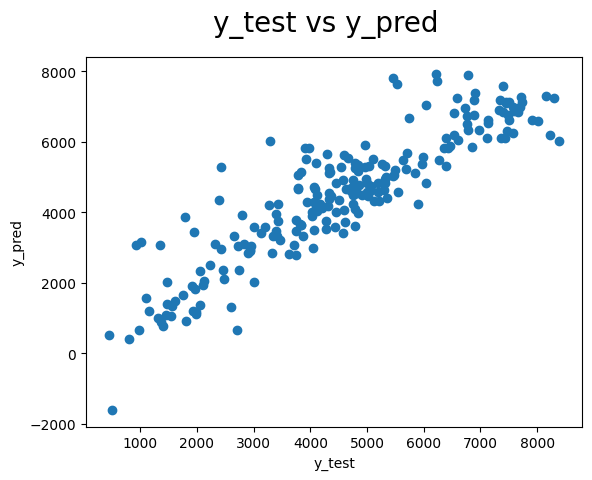

In [318]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [319]:
#find the r2 score on test data to measure
# variance in a dependent variable that can be predicted or explained by an independent variable
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7931445448609719